### Exploratory Data Analysis code for collected sensor data

Sensor Data EXP1, Run 02

- Experiment duration: 06.03.2024 - 03.04.2024 (start time around 1:30 AM night)
- Total samples: 37,436
- Sampling Period: 10 seconds
- Microcontroller: rpi picoW
- Sensor: Bosch BMP280 temperature pressure sensor
- Sensor data transfer from sensor to MCU via I2C
- Sensor data transfer to server via MQTT Wirelessly
- Data logging using Node-red flow into CSV files



In [13]:
### Required libraraies and modules

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline


In [14]:
# Figure settings

sns.set(style="whitegrid")

rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [15]:
# Importing dataset as Pandas dataframes

df_BMP280_EXP01_DA02 = pd.read_csv('SD_06.04.2024_CSVFile.csv')

# size of dataframe
df_BMP280_EXP01_DA02.shape

(37436, 3)

In [16]:
print(df_BMP280_EXP01_DA02.head())

   Temperature_C  Pressure_P  Message Number
0          26.24    97687.56               0
1          26.26    97687.89               1
2          26.26    97688.22               2
3          26.24    97686.69               3
4          26.23    97687.88               4


In [17]:
df_BMP280_EXP01_DA02.describe()

,Temperature_C,Pressure_P,Message Number
count,37436.000000,37436.000000,37436.000000
mean,26.813564,97552.848434,18717.500000
std,0.678769,463.768780,10806.986675
min,22.980000,96662.300000,0.000000
25%,26.460000,97267.637500,9358.750000
50%,26.930000,97539.635000,18717.500000
75%,27.360000,97713.780000,28076.250000
max,27.710000,98953.790000,37435.000000


#### Manipulating dataframes for timestamp insertion

In [18]:
### Inserting Time Vector into the dataframe

time_interval = 10                      # Time-interval between the samples is 10 seconds
num_samples = len(df_BMP280_EXP01_DA02)
time_vector = range(0, num_samples*time_interval, time_interval)
df_BMP280_EXP01_DA02['Time_Sec'] = time_vector
print(df_BMP280_EXP01_DA02.head())

   Temperature_C  Pressure_P  Message Number  Time_Sec
0          26.24    97687.56               0         0
1          26.26    97687.89               1        10
2          26.26    97688.22               2        20
3          26.24    97686.69               3        30
4          26.23    97687.88               4        40


In [26]:
# Creating and checking the start timestamp 

start_timestamp = pd.Timestamp(year=2024, month=4, day=6, hour=1, minute= 30, second=0)
Time_stamp_now = pd.Timestamp.now()
print(start_timestamp -Time_stamp_now)

-7 days +19:58:45.299457


In [20]:
# Inserting the timestamp column in the dataframe

Time_stamp_vetor = pd.date_range(start = start_timestamp, periods = num_samples, freq = '10s')
df_BMP280_EXP01_DA02['Timestamp'] = Time_stamp_vetor
print(df_BMP280_EXP01_DA02.head())

   Temperature_C  Pressure_P  Message Number  Time_Sec           Timestamp
0          26.24    97687.56               0         0 2024-04-06 01:30:00
1          26.26    97687.89               1        10 2024-04-06 01:30:10
2          26.26    97688.22               2        20 2024-04-06 01:30:20
3          26.24    97686.69               3        30 2024-04-06 01:30:30
4          26.23    97687.88               4        40 2024-04-06 01:30:40


In [21]:
# Converting Pressure into Kilo pascal

df_BMP280_EXP01_DA02['Pressure_kPa'] = df_BMP280_EXP01_DA02['Pressure_P']*.001
print(df_BMP280_EXP01_DA02.head())

   Temperature_C  Pressure_P  Message Number  Time_Sec           Timestamp  \
0          26.24    97687.56               0         0 2024-04-06 01:30:00   
1          26.26    97687.89               1        10 2024-04-06 01:30:10   
2          26.26    97688.22               2        20 2024-04-06 01:30:20   
3          26.24    97686.69               3        30 2024-04-06 01:30:30   
4          26.23    97687.88               4        40 2024-04-06 01:30:40   

   Pressure_kPa  
0      97.68756  
1      97.68789  
2      97.68822  
3      97.68669  
4      97.68788  


In [25]:
print(df_BMP280_EXP01_DA02.tail())

       Temperature_C  Pressure_P  Message Number  Time_Sec  \
37431          25.54    98945.91           37431    374310   
37432          25.54    98953.79           37432    374320   
37433          25.52    98953.30           37433    374330   
37434          25.52    98951.89           37434    374340   
37435          25.49    98947.61           37435    374350   

                Timestamp  Pressure_kPa  
37431 2024-04-10 09:28:30      98.94591  
37432 2024-04-10 09:28:40      98.95379  
37433 2024-04-10 09:28:50      98.95330  
37434 2024-04-10 09:29:00      98.95189  
37435 2024-04-10 09:29:10      98.94761  


#### Plotting and data visualization



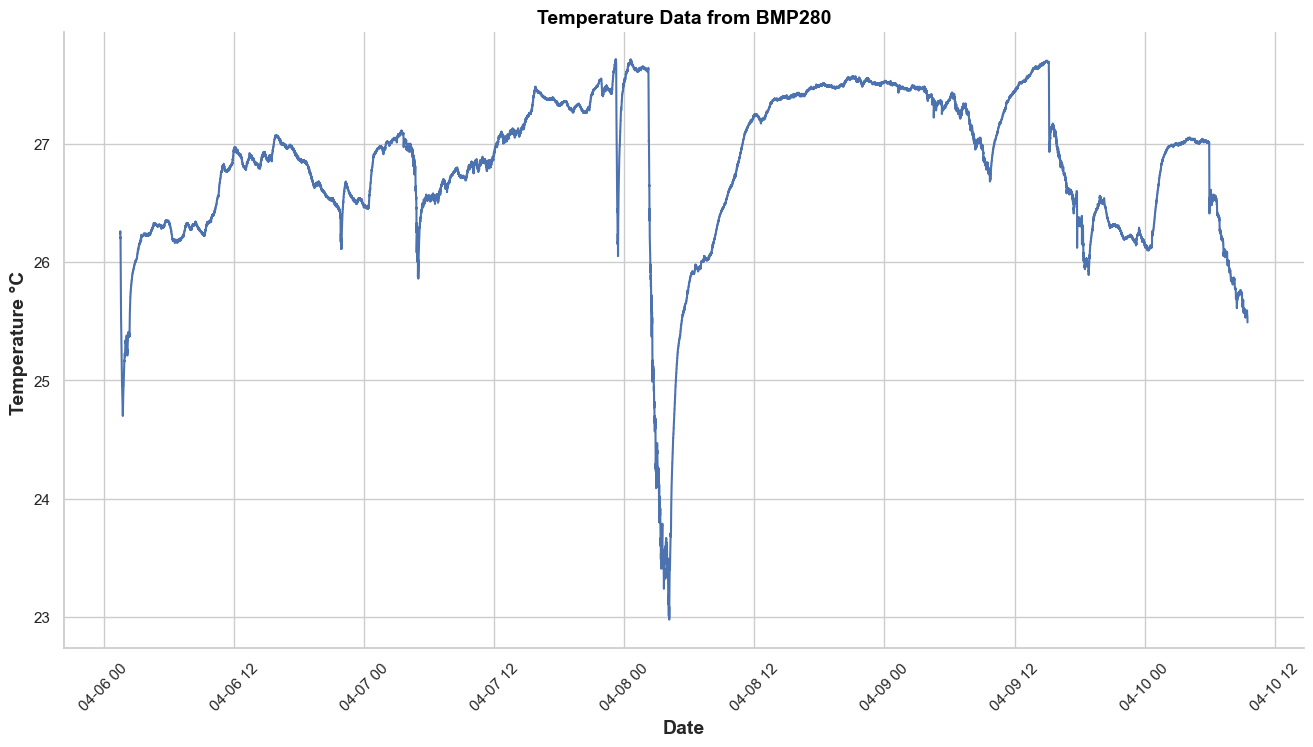

In [22]:
# Time series Plot for Temperature

plt.plot(df_BMP280_EXP01_DA02['Timestamp'], df_BMP280_EXP01_DA02['Temperature_C'])
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Temperature °C ', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.title('Temperature Data from BMP280', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (16, 8)
plt.show()

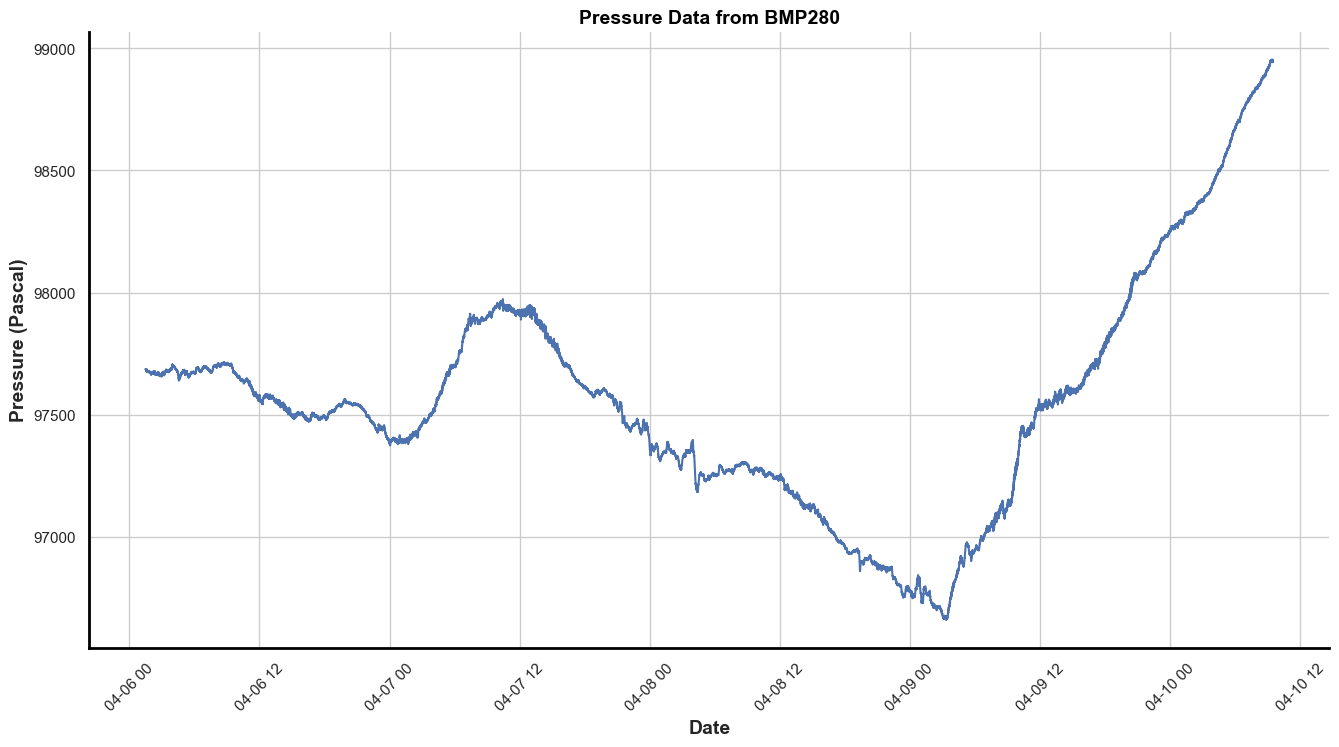

In [23]:
# Time series Plot for Pressure

plt.plot(df_BMP280_EXP01_DA02['Timestamp'], df_BMP280_EXP01_DA02['Pressure_P'])
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Pressure (Pascal)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.title('Pressure Data from BMP280', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (16, 8)
plt.show()

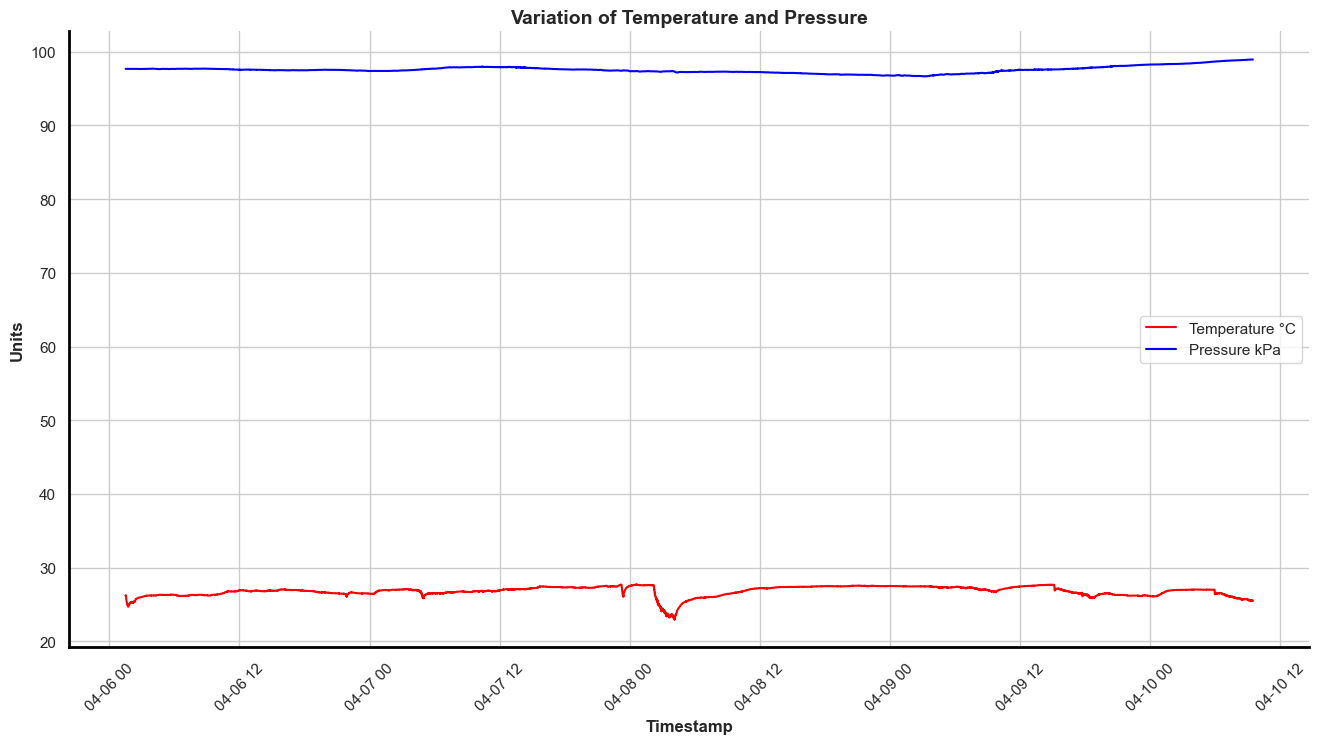

In [24]:
# Temperature and Pressure on the same plot

sns.lineplot(x='Timestamp', y='Temperature_C', data=df_BMP280_EXP01_DA02, color='red', label='Temperature °C')
sns.lineplot(x='Timestamp', y='Pressure_kPa' , data=df_BMP280_EXP01_DA02, color='blue', label='Pressure kPa')

plt.xticks(rotation=45)
plt.ylabel('Units', fontsize=12, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12, fontweight='bold')

plt.title('Variation of Temperature and Pressure', fontsize=14, fontweight='bold')
plt.legend()

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (16, 8)

#plt.savefig('MS1_Temp_Press_Time_Series_01', dpi=1200, bbox_inches='tight')
plt.show()